In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import astropy.table as tbl

In [2]:
specs = []
for x in glob.glob('../data/specs/*P60*.ascii'):
    s = tbl.Table.read(x, format='ascii')
    specs.append(s)


In [32]:
X = np.empty((len(specs), len(specs[0])))
for i,x in enumerate(specs):
    X[i] = x['col2']/np.nanmean(x['col2'])
print(X.shape)

(19, 214)


In [33]:
pca = PCA(n_components=5)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
print(pca.explained_variance_ratio_)

[0.42836437 0.25962686 0.14112311 0.05535615 0.03747313]


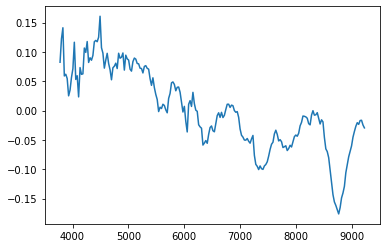

In [41]:
plt.plot(specs[0]['col1'], pca.components_[0])
#plt.plot(specs[0]['col1'], specs[0]['col2']/np.nanmean(specs[0]['col2']))

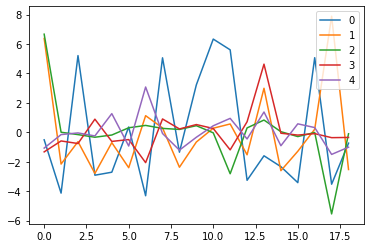

In [36]:
trans = pca.transform(X)
for i in range(5):
    plt.plot(trans[:,i], label='%d' % i)
plt.legend()